# Taken from datanovia
https://www.datanovia.com/en/blog/gganimate-how-to-create-plots-with-beautiful-animation-in-r

This article uses the gganimate to create animated plots.  The latest version of this package can be installed with:

devtools::install_github('thomasp85/gganimate').

In [2]:
shhh <- suppressPackageStartupMessages # It's a library, so shhh!warnings
shhh(library(tidyverse))
library(gganimate)
theme_set(theme_bw())

No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session



First, we're using the Gapminder demographic data, presented by Hans Gosling and held in the R gapminder library.

In [3]:
library(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


First, we'll do a scatter plot with the following dimensions and encodings:

- GPD per capita (gdpPercap) on the x-axis.  This will be shown on a logarithmic scale (scale_x_log10)
- Life expectancy in years (lifeExp) on the y-axis.
- Population (pop) - size of the point. Legends are suppressed.
- Country (country) - colour of the point. Legends are suppressed.

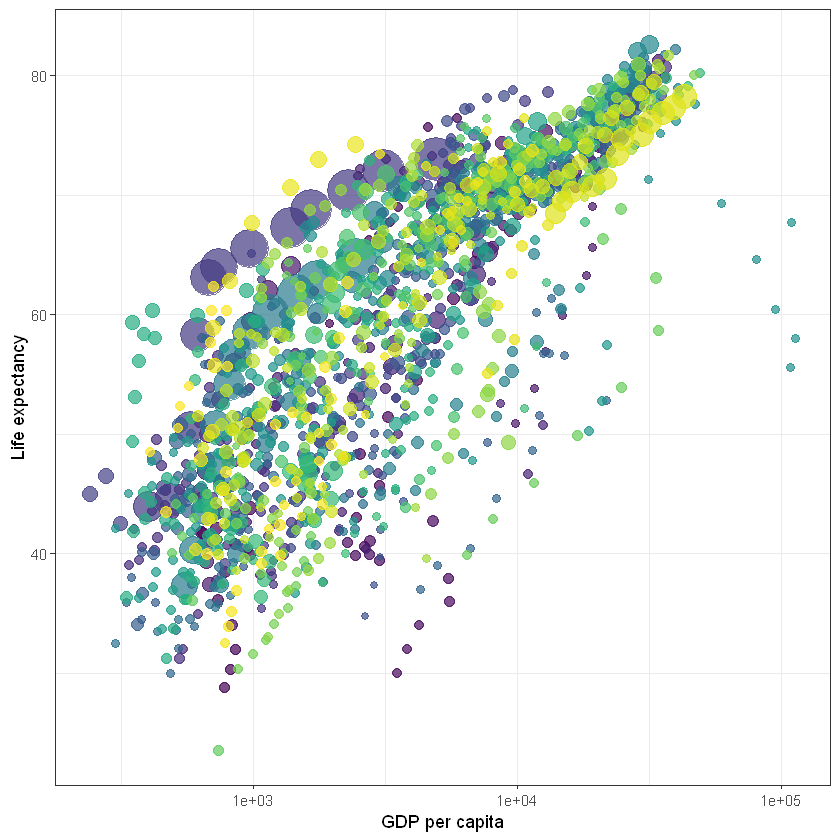

In [4]:
#Static plot
p <- ggplot(
  gapminder, 
  aes(x = gdpPercap, y=lifeExp, size = pop, colour = country)
  ) +
  geom_point(show.legend = FALSE, alpha = 0.7) +
  scale_color_viridis_d() +
  scale_size(range = c(2, 12)) +
  scale_x_log10() +
  labs(x = "GDP per capita", y = "Life expectancy")
p

We will add a time dimension to the data shown above.  The gapminder data has an extra column 'year'.  We can use this to transition through time.  Remember, our previous plot is saved as p.  To show which year is currently displayed, the title shows the current value of Year.

This will generate a GIF.  Before generating it and saving it, we'll set up a function to display it.

In [5]:
display_gif <- function(raw){
    contents <- base64enc::base64encode(raw)
    tag <- '<img src="data:image/gif;base64,%s">'
    IRdisplay::display_html(sprintf(tag, contents))
}

Now we'll generate the GIF.

In [13]:
p + transition_time(year) +
  labs(title = "Year: {frame_time}")
anim_save(file.path('.','Plots',"GM1.gif"), animation = last_animation())


Rendering [>-------------------------------------------] at 6.3 fps ~ eta: 16s

Rendering [>-------------------------------------------] at 5.2 fps ~ eta: 19s

Rendering [=>------------------------------------------] at 5.4 fps ~ eta: 18s

Rendering [=>------------------------------------------] at 5.5 fps ~ eta: 17s

Rendering [==>-----------------------------------------] at 5.5 fps ~ eta: 17s

Rendering [===>----------------------------------------] at 5.4 fps ~ eta: 17s

Rendering [====>---------------------------------------] at 5.6 fps ~ eta: 16s

Rendering [=====>--------------------------------------] at 5.6 fps ~ eta: 16s

Rendering [=====>--------------------------------------] at 5.6 fps ~ eta: 15s

Rendering [======>-------------------------------------] at 5.5 fps ~ eta: 15s

Rendering [======>-------------------------------------] at 5.6 fps ~ eta: 15s

Rendering [=======>------------------------------------] at 5.7 fps ~ eta: 14s

Rendering [========>-------------------

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

ERROR: Error: The animation object does not specify a save_animation method


We'll save it in our Plots subdirectory and display it from there.

In [7]:
anim_save(file.path('.','Plots',"GM1.gif"), animation = last_animation())
display_gif(file.path('.','Plots',"GM1.gif"))

ERROR: Error: The animation object does not specify a save_animation method


You can enhance the animation by allowing moving dots to have a wake.  We'll call it GM2.gif.

In [8]:
p + transition_time(year) +
  labs(title = "Year: {frame_time}") +
  shadow_wake(wake_length = 0.1, alpha = FALSE)

anim_save(file.path('.','Plots',"GM2.gif"), animation = last_animation())


Rendering [--------------------------------------------] at 3.6 fps ~ eta: 27s

Rendering [>-------------------------------------------] at 3.5 fps ~ eta: 28s

Rendering [>-------------------------------------------] at 3.3 fps ~ eta: 30s

Rendering [=>------------------------------------------] at 3.2 fps ~ eta: 30s

Rendering [=>------------------------------------------] at 3.3 fps ~ eta: 29s

Rendering [==>-----------------------------------------] at 3.2 fps ~ eta: 29s

Rendering [===>----------------------------------------] at 3.2 fps ~ eta: 28s

Rendering [===>----------------------------------------] at 3.3 fps ~ eta: 28s

Rendering [===>----------------------------------------] at 3.2 fps ~ eta: 28s

Rendering [====>---------------------------------------] at 3.3 fps ~ eta: 27s

Rendering [=====>--------------------------------------] at 3.3 fps ~ eta: 27s

Rendering [=====>--------------------------------------] at 3.2 fps ~ eta: 27s

Rendering [======>---------------------

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

ERROR: Error: The animation object does not specify a save_animation method


In [9]:

display_gif(file.path('.','Plots',"GM2.gif"))

Warning message in file(what, "rb"):
"cannot open file './Plots/GM2.gif': No such file or directory"


ERROR: Error in file(what, "rb"): cannot open the connection


### Adding another dimension

This time, we'll include the continent into the displayed data.  Each facet has a different continent.

In [12]:
p + facet_wrap(~continent) +
  transition_time(year) +
  labs(title = "Year: {frame_time}")

anim_save(file.path('.','Plots',"GM3.gif"), animation = last_animation())


Rendering [--------------------------------------------] at 2.2 fps ~ eta: 45s

Rendering [>-------------------------------------------] at 2.2 fps ~ eta: 45s

Rendering [=>------------------------------------------] at 2.1 fps ~ eta: 46s

Rendering [=>--------------------------------------------] at 2 fps ~ eta: 47s

Rendering [==>-------------------------------------------] at 2 fps ~ eta: 48s

Rendering [==>-------------------------------------------] at 2 fps ~ eta: 47s

Rendering [===>------------------------------------------] at 2 fps ~ eta: 46s

Rendering [===>------------------------------------------] at 2 fps ~ eta: 47s

Rendering [====>-----------------------------------------] at 2 fps ~ eta: 45s

Rendering [=====>----------------------------------------] at 2 fps ~ eta: 44s

Rendering [=====>----------------------------------------] at 2 fps ~ eta: 43s

Rendering [======>---------------------------------------] at 2 fps ~ eta: 42s

Rendering [=======>--------------------

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

ERROR: Error: The animation object does not specify a save_animation method


In [ ]:

display_gif(file.path('.','Plots',"GM3.gif"))

## Sea Ice dataset

### Data provenance
Data used here is from the Kaggle dataset https://www.kaggle.com/datasets/nsidcorg/daily-sea-ice-extent-data

In [ ]:
library(zoo)

In [ ]:
mydata = file.path("C:","Users","025312","Dropbox","City","pobyrne","Contents","Datasets")
datapath = file.path(mydata,"seaice.csv")
df <- read.csv(datapath)
str(df)

## Tidy and manipulate

In [ ]:
df$Date <- make_date(df$Year, df$Month, 1)
df$ym <- as.yearmon(df$Date, "%Y %m")
colnames(df)[colnames(df) == "hemisphere"] <- "Hemisphere"
df$Hemisphere[df$Hemisphere=='south'] <-'South'
df$Hemisphere[df$Hemisphere=='north'] <-'North'

In [ ]:
dfice <- df %>%
group_by(ym, Year, Month, Hemisphere) %>%
summarise_at (vars(Extent), list(Monthly_Extent=mean))

head(dfice)

#### Multi-line chart

Depicts air quality in the following dimensions and encodings:

 - Year Month (ym) (x axis)
 - Monthly Extent (y axis)
 - Hemisphere (colour of line)

In [10]:
library(zoo)
library(tidyverse)
options(repr.plot.width=16) 

dfice$ym <- as.POSIXct(dfice$ym)
p <- ggplot( dfice,
  aes(ym, Monthly_Extent, group = Hemisphere, color = Hemisphere)
  ) +
  geom_line() 

p + transition_reveal(ym)

ERROR: Error in library(zoo): there is no package called 'zoo'


In [11]:
anim_save(file.path('.','Plots',"SI1.gif"), animation = last_animation())
display_gif(file.path('.','Plots',"SI1.gif"))

ERROR: Error: The animation object does not specify a save_animation method


In [ ]:
options(repr.plot.width=12,repr.plot.height=6)
myPlot <-ggplot(dfice, aes(
    x = Month, 
    y = Monthly_Extent,  
    color=Hemisphere, 
    size=2)
               )+theme_bw() +
 geom_point(aes(size=2))+
 guides(size = 'none')+  
 labs(subtitle = 'Year: {frame_time}',
       title = 'Monthly Average Sea Ice Extents, 1978 - present',
       x = 'Month', y = 'Ice Extent (10^6 sq km)',  fill='Hemisphere')+
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12)) 
myPlot + transition_time(Year)

In [ ]:
anim_save(file.path('.','Plots',"SI2.gif"), animation = last_animation())
display_gif(file.path('.','Plots',"SI2.gif"))

## Interactive stream graphs
R has a tool and a htmlwidget that allows interactive use of streamgraphs using the babynames dataset.

Importantly, this dataset has zero or one entries per name per year, giving the number of children registered with that name. Streamgraph uses the time (year) on the x-axis, the count (n) on the y-axis (i.e. width, or wt) and uses stacked area colours to show the names. The filter allows the programmer to specify a range of, in this case, names. A pop-up box allows the user to select one of the names in the range and this name is highlighted.

In [ ]:
#install.packages("babynames")
library(streamgraph)
library(babynames)
str(babynames)

We want to only show names beginning with 'Pat', so that it won't take too long to render. 

In [ ]:
mynames <- babynames %>%
  filter(grepl("^Pat", name)) %>%
  group_by(year, name)%>%
  tally(wt=n) 

mynames  %>%
  streamgraph("name", "n", "year", offset="zero", interpolate="linear") %>%
  sg_legend(show=TRUE, label="Pat - names: ")

Let's try the other offsets:
 - expand
 - silhouette

In [ ]:
 streamgraph(
     mynames, "name", "n", "year", 
     offset="expand", interpolate="linear") %>%
  sg_legend(show=TRUE, label="Pat - names: ")

In [ ]:
 streamgraph(
     mynames, "name", "n", "year", 
     offset="silhouette", interpolate="linear") %>%
  sg_legend(show=TRUE, label="Pat - names: ")

## Using ggstream
ggstream is a package that allows the user to do static stream charts, which are easier to interpret when there is no possibility for interacting. The following charts took lists of popular names from 1950, 1980 and 2024. In each case, the graph is followed by one generated through streamgraph.

In [ ]:
library(ggstream)

First compile 3 lists of most popular names (from the Internet)

In [ ]:
list1950 <- c("Linda","James","Mary","Robert","Patricia","John","Barbara","Michael","Susan","David")

names1950s <- babynames[babynames$name %in% list1950,] %>%
 group_by(year, name)%>%
tally(wt=n)
names1950s
list2024 <- c("Luxury", "Maeve", "Aurelia", "Isla", "Luna", "Kylian", "Theodore", "Atticus", "Felix", "Silas")
names2024 <- babynames[babynames$name %in% list2024,] %>%
 group_by(year, name)%>%
tally(wt=n)


In [ ]:
ggplot (names1950s, aes(x=year, y=n, fill=name)) + geom_stream()

In [ ]:
ggplot (names2024, aes(x=year, y=n, fill=name)) + geom_stream()

In [ ]:
streamgraph(
     names1950s, "name", "n", "year", 
     offset="silhouette", interpolate="linear") %>%
  sg_legend(show=TRUE, label="Names popular in 1950s: ")